In [1]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Bộ dữ liệu tự tạo: hàm y = -3x + 5

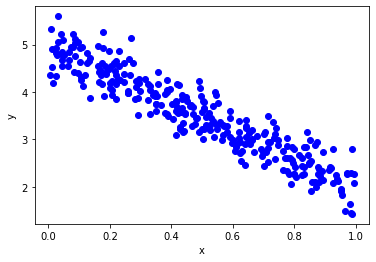

In [2]:
'''
Bộ dữ liệu thứ 1 random
'''
np.random.seed(2)
X = np.random.rand(300, 1)
y = -3 * X + 5 + 0.3*np.random.randn(300, 1) # thêm nhiễu vào
# Visualize data 
plt.plot(X, y, 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 1. Chia dữ liệu train - test

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(225, 1)
(75, 1)
(225, 1)
(75, 1)


## 2. Sử dụng tool

In [4]:
# sử dụng model LinearRegresion từ thư viện Sklearn
model = LinearRegression()
# thực hiện train dữ liệu trên tập train
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
# thực hiện dự đoán trên tập test
y_hat = model.predict(X_test)
# hiển thị MSE của dự đoán so với label
mean_squared_error(y_test, y_hat)

0.0912889743008689

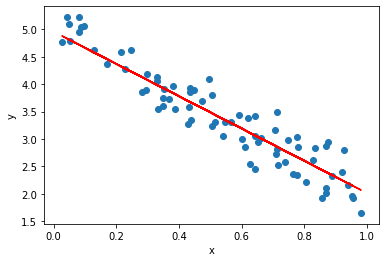

In [6]:
# Vẽ đồ thị dữ liệu test (xanh) và đường dự đoán (đỏ)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_hat, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
# in weight học được w1, w0
print(model.coef_, model.intercept_)

[[-2.94802998]] [4.95850025]


## 3. My Gradient Descent Linear Regression

In [8]:
class GDLinearRegression:
    def __init__(self, lr, step):
        '''
        Khởi tạo learning rate và số lượng step update weigh
        '''
        self.lr = lr
        self.step = step
        
    def fit(self, X, y):
        ''' 
        Train the model với đầu vào là tập train data X cùng nhãn Y
        X là ma trận MxN trong đó M là số lượng điểm dữ liệu, mỗi điểm dữ liệu có N chiều.
        Trường hợp dữ liệu 1 chiều thì X là vector cột Mx1
        '''
        # lấy ra số lượng điểm train_size và số chiều dữ liệu n_features
        self.n_features = X.shape[1] if len(X.shape) > 1 else 1 
        train_size = len(X) # số lượng sample
        
        # chuẩn hóa lại định dạng dữ liệu
        X = X.reshape(-1, self.n_features)
        y = y.reshape([-1, 1])
        
        # ta muốn thực hiện dự đoán y = X.T*W + bias, ta đưa bias vào W (W|bias) và 1 cột toàn 1 vào X (X|one),
        # lúc đó việc tính toán thuận tiện hơn y = (X|one).T*(W|bias) => đây là trick để tính toán cho nhanh
        one = np.ones([train_size, 1])
        X = np.concatenate([X, one], 1)
        
        # tạo weight chính là parameters ta sẽ optimize trong quá trình train
        self.weight = np.zeros([self.n_features + 1, 1])
        print('x shape: ', X.shape, '- y shape: ', y.shape, '- weight shape: ', self.weight.shape, 'train_size: ', train_size)
        
        # mảng lưu lại toàn bộ giá trị loss trong quá trình train
        self.train_loss = []
        
        # train
        for i in range(self.step):
            
            loss = np.sum((y - np.dot(X, self.weight)) ** 2)
            delta = np.dot(X.T, ( np.dot(X, self.weight) - y))
            
            # update weight
            self.weight = self.weight - (self.lr/train_size) * delta
            
            # tính trung bình loss
            loss = loss/train_size
            self.train_loss.append(loss.item())
    
    def predict(self, X):
        '''
        Thực hiện dự đoán
        '''
        # chuẩn hóa format dữ liệu như ta đã làm trong lúc train
        X = X.reshape(-1, self.n_features)
        
        # thêm cột one như ta đã làm trong lúc train
        one = np.ones([len(X), 1])
        X = np.concatenate([X, one], 1)
        
        # thực hiện dự đoán, đơn giản là nhân ma trận
        y_hat = np.dot(X, self.weight)
        
        return y_hat
    
    def print_weight(self):
        '''
        In weigt đã học được
        '''
        print(self.weight)
        
    def get_train_loss(self):
        '''
        Trả về train loss đã lưu trong quá trình train
        '''
        return self.train_loss
    

In [9]:
model = GDLinearRegression(0.1, 1000)
model.fit(X_test, y_test)

x shape:  (75, 2) - y shape:  (75, 1) - weight shape:  (2, 1) train_size:  75


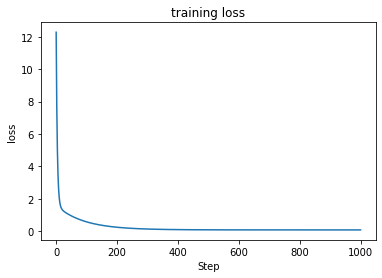

last loss:  0.0889458013624803


In [10]:
train_loss = model.get_train_loss()

plt.plot(range(len(train_loss)), train_loss)
plt.title("training loss")
plt.xlabel("Step")
plt.ylabel("loss")
plt.show()
print("last loss: ", train_loss[-1])

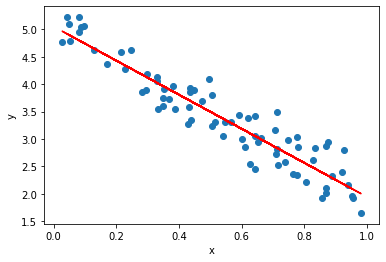

In [11]:
y_hat = model.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_hat, 'r')
plt.xlabel('x')
plt.ylabel('y')
# plt.title('y=-3x+5')
plt.show()

In [12]:
# kiểm tra lại weight đã học được, khá gần với hệ số trong hàm số y = -3x + 5
model.print_weight()

[[-3.10999554]
 [ 5.05090582]]


# Bộ dữ liệu thực tế - giá nhà Boston
Chú ý, việc lấy data ra như thế này là kết quả của việc xem xét kỹ lưỡng dataset Boston. Ở ví dụ này, chỉ lấy 1 đặc điểm nhà trong số rất nhiều đặc điểm của nhà để dự đoán giá. Lý do là để thuận tiện cho việc vẽ đồ thị.

$ \hat{y} = bias + x*w $

hàm số này có thể biểu diễn trên mặt phẳng 2D

trong thực tế, ta có thể lấy nhiều đặc điểm hơn, lúc đó hàm dự đoán là hàm đa biến:

$ \hat{y}= bias + x*w_1 + x_2*w_2 + .. + x_n*w_n $

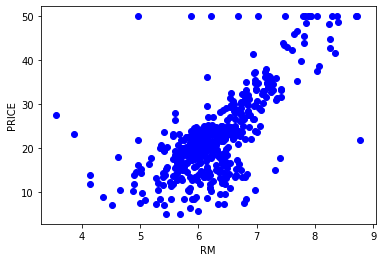

In [13]:
boston_data = load_boston()
X = boston_data.data[:, 5, np.newaxis]   # trường thứ 5 là RM (số phòng)
y = boston_data.target[:, np.newaxis]    # taget là giá nhà

# Visualize data 
plt.plot(X, y, 'bo')
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.show()

## 1. Chia dữ liệu train - test

In [14]:
# trước hết cần scale data để tránh trường hợp số lớn làm tràn phép tính
scalerx = StandardScaler()
scalery = StandardScaler()
X_scaled = scalerx.fit_transform(X)
y_scaled = scalery.fit_transform(y)

# chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 1)
(127, 1)
(379, 1)
(127, 1)


## 2. Sử dụng tool

In [15]:
# lấy model LinearRegression từ thư viên SKlearn
model = LinearRegression()
# thực hiện train model trên tập train
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# thực hiện train model trên tập test
y_hat = model.predict(X_test)

# tính sai số lỗi MSE của dự đoán so với thực tế trên tập test
mse = mean_squared_error(y_hat, y_test)
print(mse)

0.5487795792130881


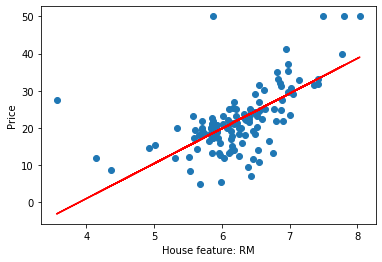

In [17]:
# hiển thị đồ thị dữ liệu test (xanh) và đường dự đoán đã học được (đỏ)
plt.scatter(scalerx.inverse_transform(X_test), scalery.inverse_transform(y_test))
plt.plot(scalerx.inverse_transform(X_test), scalery.inverse_transform(y_hat), 'r')
plt.xlabel('House feature: RM')
plt.ylabel('Price')
plt.show()

In [18]:
# in weight w0, w1 mà model của sklearn đã học w1, w0
print(model.coef_, model.intercept_)

[[0.71904031]] [0.0025078]


## 3. My Gradient Descent Linear Regression

x shape:  (379, 2) - y shape:  (379, 1) - weight shape:  (2, 1) train_size:  379


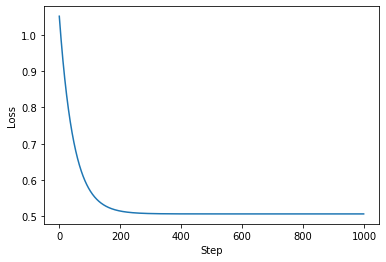

In [19]:
# Ta đã thực hiện implement GDLinearRegression ở trên
# Giờ ta chỉ việc tạo mới model với learning rate là 0.01 và 
# số lượng step là 1000
mymodel = GDLinearRegression(0.01, 1000)
# thực hiện train dữ liệu
mymodel.fit(X_train, y_train)

# vẽ biểu đồi training loss
train_loss = mymodel.get_train_loss()
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()

In [20]:
# thực hiện dự đoán trên tập test
y_hat = mymodel.predict(X_test)
mse = mean_squared_error(y_hat, y_test)

# in mean squared error trên tập test
print('Test MSE: ', mse)


Test MSE:  0.5487761484737099


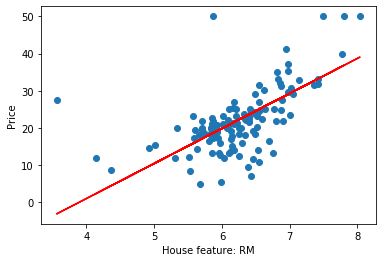

In [21]:
# hiển thị đồ thị dữ liệu test (xanh) và đường dự đoán đã học được (đỏ)
plt.scatter(scalerx.inverse_transform(X_test), scalery.inverse_transform(y_test)) 
plt.plot(scalerx.inverse_transform(X_test), scalery.inverse_transform(y_hat), 'r')
plt.xlabel('House feature: RM')
plt.ylabel('Price')
plt.show()

In [22]:
# in weight học được w1, w0. Khá sát với weight học được bằng cộng cụ sklearn
mymodel.print_weight()

[[0.7190214 ]
 [0.00251468]]


In [23]:
bostondb = load_boston()
X = bostondb.data
bos = pd.DataFrame(X)
bos.columns = bostondb.feature_names
print(bos.info())
bos.head()

# bostondb

NameError: name 'pd' is not defined